<a href="https://colab.research.google.com/github/Kingculture-langa/Netflix-Data-analysis/blob/main/Nextflix_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Netflix data analytics using python

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Loading The Dataset

In [163]:
filepath = "/content/sample_data/netflix1.csv"
df = pd.read_csv(filepath)
rows, column = df.shape

Data

In [164]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [165]:
df.sample()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
5081,s6996,Movie,Hope: One in a Billion,Brodje Wemboendja,United States,12/15/2019,2017,TV-14,81 min,"Documentaries, International Movies, Sports Mo..."


In [166]:
df.tail()



,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV
8789,s8786,TV Show,YOM,Not Given,Pakistan,6/7/2018,2016,TV-Y7,1 Season,Kids' TV


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [168]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
country,object
date_added,object
release_year,int64
rating,object
duration,object
listed_in,object


# Handling missing Values, Duplicates and Data validation
In this case our data had two columns, Director and Country, where director and country names are not given.

1. Replace "Not given with Null"
2. Calculate perntage of null values per column(Director and Cuntry)
3. Drop or replace nulls with  Uknown Directo for column Director and Unknown Country for column Counry
4. Detect and remove duplicates
5. Validate and standardize column values
6. Drop unwanted columns Show_ID
7. Save cleaned dataset as CSV



In [169]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

# 1.Replace "Not Given" with null, to ensure consistancy in handlng missing values

In [170]:
df['director'] = df['director'].replace('Not Given', np.nan)
df['country'] = df['country'].replace('Not Given', np.nan)

print("Missing values after replacing 'Not Given':")
print(df[['director', 'country']].isnull().sum())

Missing values after replacing 'Not Given':
director    2588
country      287
dtype: int64


# 2. Calculate perntage of null values per column(Director and Cuntry)

Calculating the percentage of the country with missing Director

In [171]:

def missng_director():
  missing_director_count = df['director'].isnull().sum()
  percentage = (missing_director_count / rows) * 100
  return percentage

print (f"Percentage of missing directors: {missng_director():.2f}%")

Percentage of missing directors: 29.44%


29% of the movies have missing directors, we can not drop the rows of missing directors as we will lose 29% of the dataset, We will replace Missing directors with values (Uknown Director)

Calculating the percentage of the country with missing county

In [172]:

def missng_country():
  missing_country_count = df['country'].isnull().sum()
  percentage = (missing_country_count / rows) * 100
  return percentage

print (f"Percentage of missing Countries: {missng_country():.2f}%")

Percentage of missing Countries: 3.27%


3.27% approximatley 3% of the country column has missing infomation, county of origin of the movie is not given, we can drop rows where the counry is not given,as we will lose a small portion of the dataset

# 3. Drop or replace nulls with Uknown Director for column Director and Unknown Country for column Counry


*   For Director column, null values replaced with "Uknown Director"
*   For Country Column , null vallues are Dropped



In [173]:
df['director'].fillna('Unknown Director', inplace=True)

print("Missing values after handling 'director':")
print(df[['director', 'country']].isnull().sum())

Missing values after handling 'director':
director      0
country     287
dtype: int64


Dropping the 3.27% of the rows with missing country names

In [174]:
df.dropna(subset=['country'], inplace=True)
print("Missing values in 'country' after dropping:")
print(df['country'].isnull().sum())

Missing values in 'country' after dropping:
0


Checking if there is a row where both Director and County have missing values, this we return 0 becuase already we have dropped rows where county name is missing

In [175]:
null_both_df = df[df['country'].isnull() & df['director'].isnull()]
print(f"Number of rows where both 'country' and 'director' are null: {len(null_both_df)}")
display(null_both_df.head())

Number of rows where both 'country' and 'director' are null: 0


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in


# 4. Detect and remove duplicates

In [176]:
def duplicate(df):
  if df.duplicated().any()==0:
    print("There are duplicated values")

  else:
    print("There are no duplicated values")

  return df


# 5. Validate and standardize column values

In [177]:
df.rename(columns={"listed_in":"genre"}, inplace=True)
df.head(1)

,show_id,type,title,director,country,date_added,release_year,rating,duration,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries


# 6. Drop showID colunm because it is useless in our project

In [178]:
df.drop(["show_id"], axis=1 ,inplace=True)
df.columns

Index(['type', 'title', 'director', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'genre'],
      dtype='object')

# 7. Save the cleaned CSV File

In [179]:
df.to_csv("netflix_cleaned.csv", index=False)
clean_File = pd.read_csv("netflix_cleaned.csv")
clean_File.head()

,type,title,director,country,date_added,release_year,rating,duration,genre
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [180]:

#This shows the shape of the data set, number of rows and number of coumns(rows, columns)
df.shape

(8503, 9)

 Exploratory Data Analysis (EDA)

In [181]:
Country_count =df["country"].value_counts(dropna= False)
print(Country_count)


country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Canada             271
                  ... 
Luxembourg           1
Senegal              1
Belarus              1
Puerto Rico          1
Cyprus               1
Name: count, Length: 85, dtype: int64


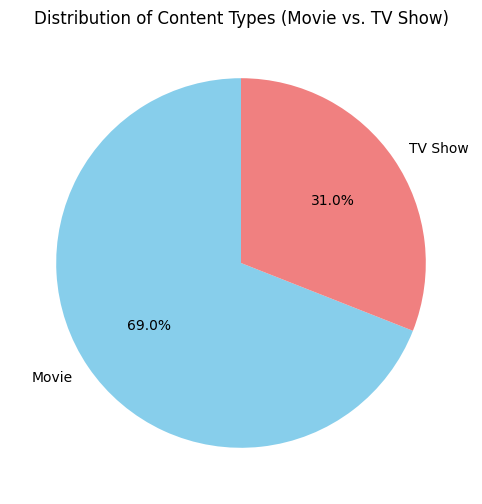

In [182]:
type_counts = df['type'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Content Types (Movie vs. TV Show)')
plt.ylabel('') # Hide the default 'y' label from pandas series plot
plt.show()

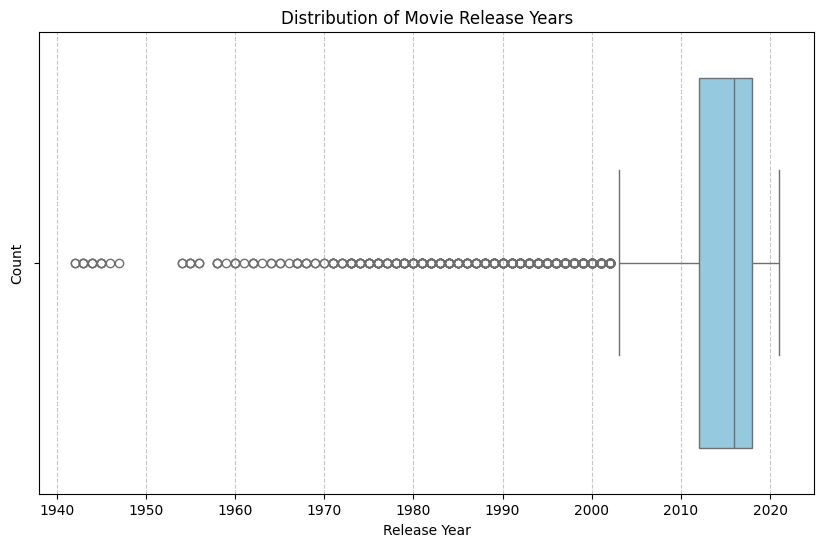

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for movies only
movies_df = df[df['type'] == 'Movie']

plt.figure(figsize=(10, 6))
sns.boxplot(x=movies_df['release_year'], color='skyblue')
plt.title('Distribution of Movie Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

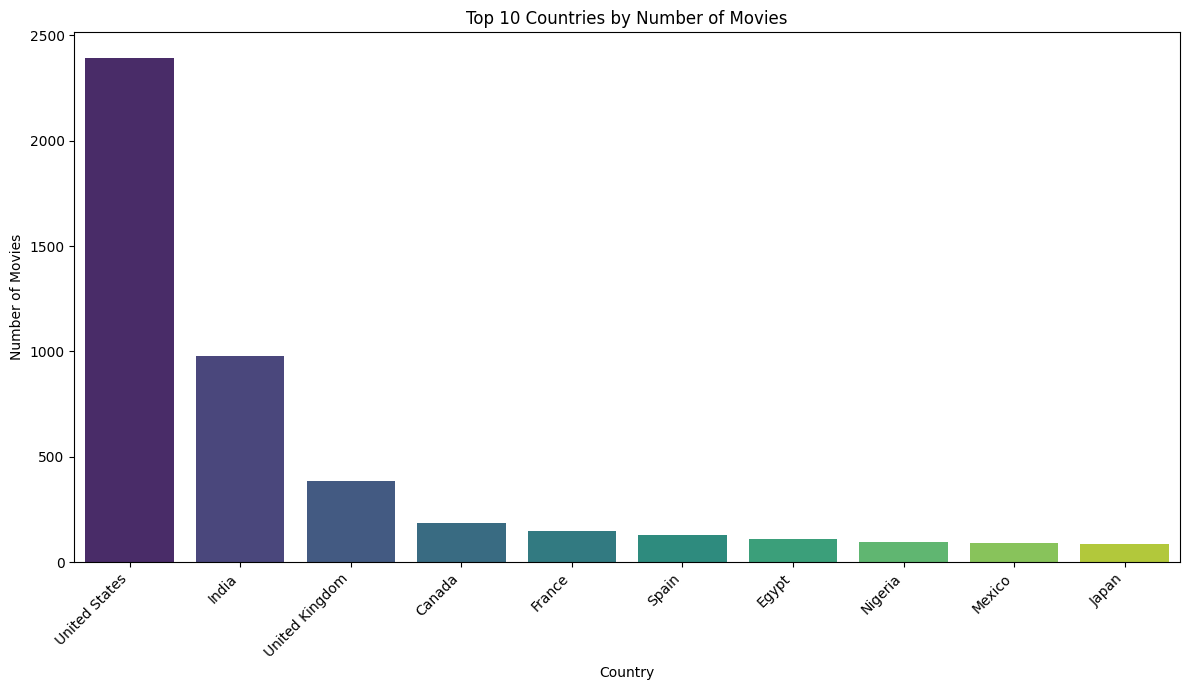

In [184]:
# Filter for movies only
movies_only_df = df[df['type'] == 'Movie']

# Count movies per country
country_counts = movies_only_df['country'].value_counts().head(10)

# Create the bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.title('Top 10 Countries by Number of Movies')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

tv_shows_on

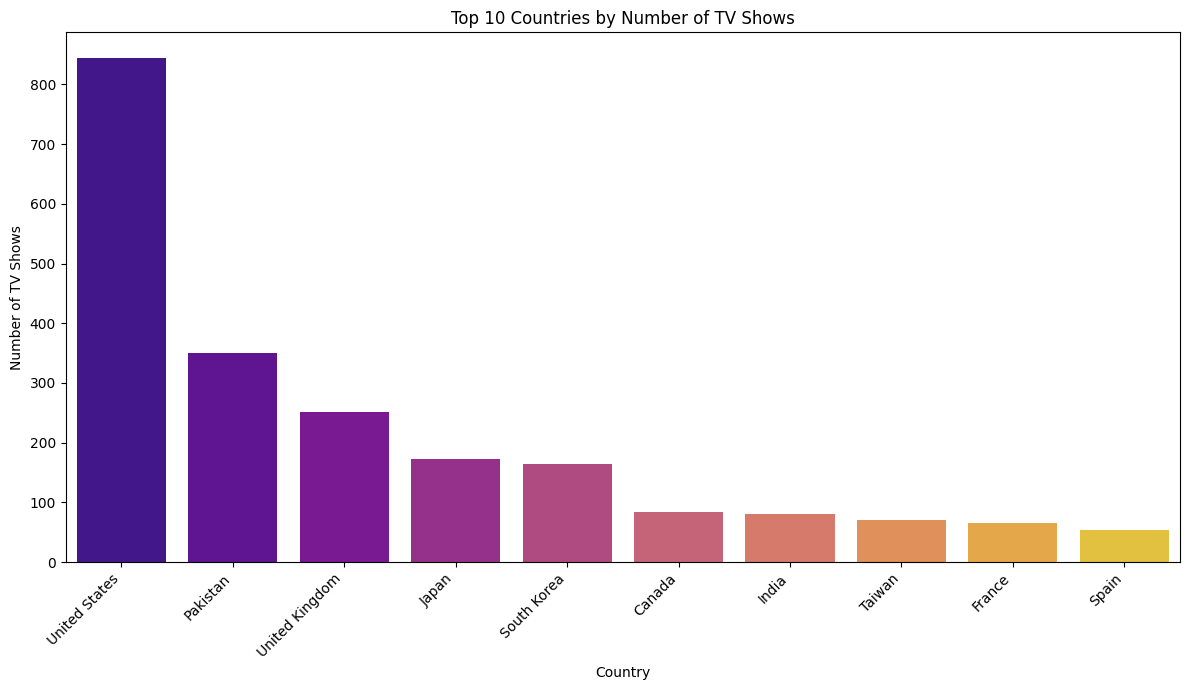

In [185]:
# Filter for TV Shows only
tv_shows_df = df[df['type'] == 'TV Show']

# Count TV shows per country
tv_show_country_counts = tv_shows_df['country'].value_counts().head(10)

# Create the bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x=tv_show_country_counts.index, y=tv_show_country_counts.values, palette='plasma')
plt.title('Top 10 Countries by Number of TV Shows')
plt.xlabel('Country')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()